The article "prediction of Wine Quality Using Machine Learning" states that it used the red wine dataset. Paragraph 2.1 mentions that the dataset contains 4898 entries. When examing the datasets, this number corresponds to the white wine dataset. This confusion in consistent throughout the article. From this point on the white wine dataset will be used, eventhough the article states that the red wine dataset is used.

In [10]:
from xml.sax.handler import feature_string_interning

# used libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import pearsonr


In [2]:
#import the winequality dataset

# Define the relative path to the CSV file
relative_path = 'wine+quality/winequality-white.csv'
# Read the CSV file using pandas
wine_df = pd.read_csv(relative_path, delimiter=';')

features = wine_df.drop('quality', axis=1)
target = wine_df['quality']

len(features)


4898

Feature scaling was applied using standardization. Following code standardizes the dataset.

In [3]:
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

feature_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
feature_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


Create the train, validation and test set from the original data set

In [4]:
# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_train, features_temp, target_train, target_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=1)

# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_test, features_validate, target_test, target_validate = train_test_split(features_temp, target_temp, test_size=0.5, random_state=1)

# Now, features_train and target_train contain the training data (60% of the original data)
# features_test and target_test contain the testing data (20% of the original data)
# features_validate and target_validate contain the validation data (20% of the original data)


Create a ANN model with:
- 1 input layer with 11 neurons
- 3 hidden layers with 15 neurons
- 1 output layer with 1 neuron

In [5]:
# Initialize the Sequential model
model = Sequential()

#add layers
model.add(Input(shape=(11,))) # input layer
model.add(Dense(15, activation='relu')) # first hidden layer
model.add(Dense(15, activation='relu')) # second hidden layer
model.add(Dense(15, activation='relu')) # third hidden layer
model.add(Dense(1, activation='linear')) # Output layer

# Compile the model with mean squared error loss and Adam optimizer
# Also include mean squared error, mean absolute error, and mean absolute percentage error as metrics
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Print the summary of the model architecture
model.summary()

2025-04-05 22:52:10.981722: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676 (2.64 KB)

 Trainable params: 676 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model with the training data
# - epochs: Number of times the model will iterate over the entire training dataset
# - batch_size: Number of samples per gradient update
# - validation_data: Data on which to evaluate the loss and metrics at the end of each epoch
# - verbose: Verbosity mode (1 = progress bar)
history = model.fit(features_train, target_train, epochs=50, batch_size=32, validation_data=(features_validate, target_validate), verbose=1)

# Print the training history
# history.history contains the loss and metrics values for each epoch
print(history.history)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 27.8201 - mean_absolute_error: 5.1075 - mean_absolute_percentage_error: 86.8966 - mean_squared_error: 27.8201 - val_loss: 6.8277 - val_mean_absolute_error: 2.0868 - val_mean_absolute_percentage_error: 35.7084 - val_mean_squared_error: 6.8277
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1427 - mean_absolute_error: 1.7556 - mean_absolute_percentage_error: 30.6294 - mean_squared_error: 5.1427 - val_loss: 3.1267 - val_mean_absolute_error: 1.3532 - val_mean_absolute_percentage_error: 23.4582 - val_mean_squared_error: 3.1267
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6203 - mean_absolute_error: 1.2300 - mean_absolute_percentage_error: 21.2304 - mean_squared_error: 2.6203 - val_loss: 2.1788 - val_mean_absolute_error: 1.1387 - val_mean_absolute_percentage_error: 19.7340 - val_mean_squared_error: 2.1788
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9066 - mean_absolute_error: 1.0702 - mean_ab

In [7]:
# Evaluate the model on the test data
test_loss = model.evaluate(features_test, target_test, verbose=1)

# Print the test loss
print("Test loss:", test_loss)

# Make predictions on the test data
predictions = model.predict(features_test)



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5316 - mean_absolute_error: 0.5643 - mean_absolute_percentage_error: 9.6062 - mean_squared_error: 0.5316
Test loss: [0.5440133213996887, 0.5440133213996887, 0.5727120041847229, 9.751933097839355]
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [9]:

# Initialize lists to store metrics
train_r_values = []
train_mse_values = []
train_mape_values = []
test_r_values = []
test_mse_values = []
test_mape_values = []

# Function to calculate metrics (R, MSE, MAPE)
def calculate_metrics(y_true, y_pred):
    # Calculate R (Pearson correlation coefficient)   
    r, _ = pearsonr(y_true, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    return r, mse, mape

# Repeat the experiment for random_state 1 to 100
for random_state in range(1, 10):
    # Split the data into training and temporary sets
    features_train, features_temp, target_train, target_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=random_state)
    
    # Split the temporary set into testing and validation sets
    features_test, features_validate, target_test, target_validate = train_test_split(features_temp, target_temp, test_size=0.5, random_state=random_state)
    
    # Initialize the Sequential model
    model = Sequential()
    
    # Add the input layer with 11 features
    model.add(Input(shape=(11,)))  # Input layer with 11 features
    
    # Add the first hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # First hidden layer
    
    # Add the second hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # Second hidden layer
    
    # Add the third hidden layer with 15 neurons and ReLU activation
    model.add(Dense(15, activation='relu'))  # Third hidden layer
    
    # Add the output layer with 1 neuron and linear activation
    model.add(Dense(1, activation='linear'))  # Output layer
    
    # Compile the model with mean squared error loss and Adam optimizer
    # Also include mean squared error, mean absolute error, and mean absolute percentage error as metrics
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])
    
    # Train the model with the training data
    history = model.fit(features_train, target_train, epochs=50, batch_size=32, validation_data=(features_validate, target_validate), verbose=0)
    
    # Make predictions on the training and test data
    train_predictions = model.predict(features_train)
    test_predictions = model.predict(features_test)
    
    # Calculate metrics for training data set
    train_r, train_mse, train_mape = calculate_metrics(target_train, train_predictions)
    
    # Calculate metrics for testing data set
    test_r, test_mse, test_mape = calculate_metrics(target_test, test_predictions)
    
    # Store the metrics in the lists
    train_r_values.append(train_r)
    train_mse_values.append(train_mse)
    train_mape_values.append(train_mape)
    test_r_values.append(test_r)
    test_mse_values.append(test_mse)
    test_mape_values.append(test_mape)

    print(random_state)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


1
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


2
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


4
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


6
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


7
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)
/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


8
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


9


/tmp/ipykernel_43013/1950007655.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_true, y_pred)


In [11]:
# Reference values for ANN model
reference_values_ann = {
    "Training Data Set": {"R": 0.66, "MSE": 0.37, "MAPE": 0.14},
    "Testing Data Set": {"R": 0.58, "MSE": 0.4, "MAPE": 0.12}
}


Training Data Set Metrics:
R values: [array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan])]
MSE values: [0.4570007920265198, 0.4386994242668152, 0.43422073125839233, 0.44980499148368835, 0.4804772138595581, 0.44346383213996887, 0.454471230506897, 0.4513114392757416, 0.45432451367378235]
MAPE values: [0.09487459808588028, 0.09074681252241135, 0.08824052661657333, 0.0909239649772644, 0.09341134876012802, 0.09121543914079666, 0.09458625316619873, 0.09132010489702225, 0.09205880761146545]

Testing Data Set Metrics:
R values: [array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

/home/abroer/miniconda3/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/abroer/miniconda3/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

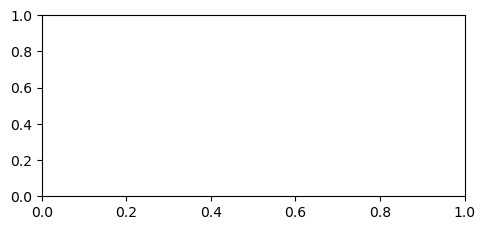

In [12]:

# Print collected metrics for verification
print("Training Data Set Metrics:")
print("R values:", train_r_values)
print("MSE values:", train_mse_values)
print("MAPE values:", train_mape_values)

print("\nTesting Data Set Metrics:")
print("R values:", test_r_values)
print("MSE values:", test_mse_values)
print("MAPE values:", test_mape_values)

# Visualize the metrics in Gaussian curves along with reference values from ANN model
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.hist(train_r_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["R"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set R Values')
plt.xlabel('R')
plt.ylabel('Density')

plt.subplot(3, 2, 2)
plt.hist(test_r_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["R"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set R Values')
plt.xlabel('R')
plt.ylabel('Density')

plt.subplot(3, 2, 3)
plt.hist(train_mse_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["MSE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set MSE Values')
plt.xlabel('MSE')
plt.ylabel('Density')

plt.subplot(3, 2, 4)
plt.hist(test_mse_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["MSE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set MSE Values')
plt.xlabel('MSE')
plt.ylabel('Density')

plt.subplot(3, 2, 5)
plt.hist(train_mape_values, bins=30, density=True)
plt.axvline(reference_values_ann["Training Data Set"]["MAPE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Training Data Set MAPE Values')
plt.xlabel('MAPE')
plt.ylabel('Density')

plt.subplot(3, 2, 6)
plt.hist(test_mape_values, bins=30, density=True)
plt.axvline(reference_values_ann["Testing Data Set"]["MAPE"], color='r', linestyle='dashed', linewidth=2)
plt.title('Testing Data Set MAPE Values')
plt.xlabel('MAPE')
plt.ylabel('Density')

plt.tight_layout()
plt.show()